<h1>Introduction</h1>
<p>In these lab notes we will introduce you to Naïve Bayes and your task is to implement a relatively simple spam filter.  We will use a small data set to train and test the model (available on Blackboard). </p> 

<b>Note:</b>  Use Jupyter Notebook or Google Colab (NOT Jupyter Lab).
    
<p>The messages within the datasets have already been classified as spam, or ham (not spam). </p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, this task does not permit the use of the scikit-learn library or similar libraries that perform similar tasks.  We hope that this will help with your understanding of the implementation details.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set.  You could also use arbitrary values, for example; you could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam.  The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>Additional Libraries</h3>
<p>As you progress through the exercises you may need additional libraries that are not installed, for example when visualising the data you may need to import WordCloud.  If you use [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) the necessary libraries will be available, which will save you having to pip install.  </p>
<h3>The Implementation</h3>
<p>We have tried to keep the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam.   The final exercise allows you to make recommendations how the model could be improved.    </p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>
<p>You may encounter the error: UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte.  You don't need to edit the datafile,  as you should be able to successfully read in the datafile by changing the encoding to latin-1.</p>
<p>[1 Mark]</p>

In [1]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding='latin-1')
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  You should be left with a dataset that only contains alpha characters (including spaces).  You should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[1 Marks]

In [2]:
import re

# Loop through each string in df, remove punctuation, add to clean data
clean_data = []
for text in df['v2']:
    clean_text = re.sub('[^a-zA-Z\\s$]', '', text.lower())
    clean_data.append(clean_text)

# Store the cleaned data into clean df
clean = df.copy()
clean['v2'] = pd.DataFrame(clean_data)

# Remove the null columns and rename v1,v2
clean = clean.drop(clean.columns[-3:], axis=1)
clean.columns = ['Category','Message']

clean.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


<h3>3. Split the Data</h3>
<p>Split the data into three random samples, one for training the model, one for validation and the other for testing the model.  Create DataFrames named train_data, validation_data and test_data.  The train_data DataFrame should contain 60-70% of the data, validation_data 15-20% and the test_data DataFrame the remaining data.<p>  

<p>[1 Mark]</p>

In [3]:
clean_shuffled = clean.sample(frac=1, random_state=1)

total_rows = df.shape[0]

# Calculate number of rows for percent of data
percent70 = int(total_rows*0.70)
percent90 = int(total_rows*0.90)
percent100 = total_rows

# Split data into test, validation, test
train_data = clean_shuffled[0:percent70]
validation_data = clean_shuffled[percent70:percent90]
test_data = clean_shuffled[percent90:percent100]

# Testing to see if they all contain some ham and some spam
print("num spam train:",(train_data['Category'] == 'spam').sum())
print("num ham train:",(train_data['Category'] == 'ham').sum())
print("num spam valid:",(validation_data['Category'] == 'spam').sum())
print("num ham valid:",(validation_data['Category'] == 'ham').sum())
print("num spam test:",(test_data['Category'] == 'spam').sum())
print("num ham test:",(test_data['Category'] == 'ham').sum())

# They all contain representatives of each class (spam/ham)

num spam train: 539
num ham train: 3361
num spam valid: 137
num ham valid: 977
num spam test: 71
num ham test: 487


<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  You should use the train_data.</p>
<p>Below is an example of what the DataFrame would look like, <i>note</i> that your values may differ depending on how the data was split.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>[2 Marks]</p>

In [4]:
def sort_unique_words_and_word_freq(data_set):
    # Sort unique words from data_set
    unique_words = set()
    for row in data_set['Message']:
        row = row.split()
        unique_words.update(row)

    # Initialise empty dictionaries
    unique_words_spam_dict = dict.fromkeys(unique_words, 0)
    unique_words_ham_dict = dict.fromkeys(unique_words, 0)

    # Count number of occurances of word for category
    for index, row in data_set.iterrows():
        messages = row['Message']
        category = row['Category']
        words = messages.split()
        for word in words:
            if(category == 'spam'):
                unique_words_spam_dict[word] +=1
            else:
                unique_words_ham_dict[word] +=1
                
    # Create dataframe
    data = {'Word': list(unique_words),
            '#Spam': unique_words_spam_dict.values(),
           '#Ham': unique_words_ham_dict.values()}

    # Create DataFrame
    word_freq = pd.DataFrame(data)
    
    return_array = []
    return_array.append(unique_words)
    return_array.append(word_freq)
    return return_array

unique_words = sort_unique_words_and_word_freq(train_data)[0]
word_freq = sort_unique_words_and_word_freq(train_data)[1]

print(word_freq.sort_values(by="#Spam", ascending=False).head(20))
word_freq.head(20)

        Word  #Spam  #Ham
576       to    497  1081
618        a    274   725
5282    call    252   159
6815     you    203  1282
4951    your    196   282
5798    free    151    46
2676     the    148   772
6924     now    141   202
3710     for    140   334
1549      or    128   150
3699      is    120   489
6522       u    119   693
4975     txt    114     7
6190      on    102   284
1621      ur    101   174
995     from    100   107
4520    have     98   295
5511  mobile     92    12
6740     and     88   609
4663   claim     86     0


,Word,#Spam,#Ham
0,canada,0,2
1,cocacola,1,0
2,powerful,0,1
3,honey,0,4
4,university,0,2
5,dear,13,70
6,kate,0,7
7,abuse,1,0
8,smsshsexnetun,1,0
9,hme,0,1


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)

<p>[1 Marks]</p>



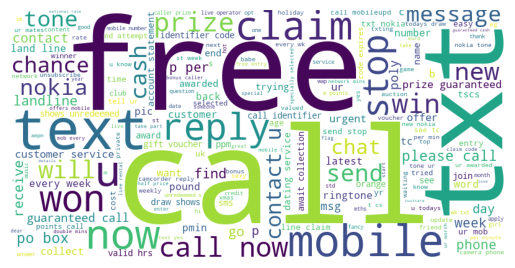

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter train_data to contain only spam messages
spam_messages = train_data[train_data['Category'] == 'spam']['Message']

# Combine all spam messages into a single string
spam_text = "".join(spam_messages)

# Plot the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam you divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message you divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table>
</p>[2 Marks]</p>


In [6]:
def create_word_prob(data_set, unique_words_input, word_freq):
    # Initialise pseudocount
    k = 0.5

    # Calculate total spam and ham
    total_spam_messages = (data_set['Category'] == 'spam').sum()
    total_ham_messages = (data_set['Category'] == 'ham').sum()

    # Calculate probabilities of word being in spam and ham
    pes_list = []
    peh_list = []

    for index, row in word_freq.iterrows():
        word = row['Word']
        num_spam = row['#Spam']
        num_ham = row['#Ham']

        pes = (num_spam+k) / (total_spam_messages+2*k)
        peh = (num_ham+k) / (total_ham_messages+2*k)

        pes_list.append(pes)
        peh_list.append(peh)

    # Create new dataframe to display data
    data = {'Word':list(unique_words_input), 'P(E|S)':pes_list, 'P(E|¬S)':peh_list }
    word_prob = pd.DataFrame(data)
    
    return word_prob


word_prob = create_word_prob(train_data,unique_words,word_freq)
word_prob.head(20)

,Word,P(E|S),P(E|¬S)
0,canada,0.000926,0.000744
1,cocacola,0.002778,0.000149
2,powerful,0.000926,0.000446
3,honey,0.000926,0.001338
4,university,0.000926,0.000744
5,dear,0.025000,0.020970
6,kate,0.000926,0.002231
7,abuse,0.002778,0.000149
8,smsshsexnetun,0.002778,0.000149
9,hme,0.000926,0.000446


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p>

In [7]:
# Variables to edit
ps = 0.4
word_to_find = 'free'

# Extracts data from dataframe
word_row = word_prob.loc[word_prob['Word'] == word_to_find]
pes = word_row['P(E|S)'].values
pens = word_row['P(E|¬S)'].values

# Performs calculations
pns = 1-ps
pse = (pes*ps)/((pes*ps)+(pens*pns))
pnse = (pens*pns) / ((pens*pns)+(pes*ps))

# Displays results
print("Word = ['"+word_to_find+"']")
print("P(E|S) =",pes)
print("P(E|¬S) =",pens) 
print("P(S|E) =",pse) # p spam
print("P(¬S|E) =",pnse) # p ham

Word = ['free']
P(E|S) = [0.28055556]
P(E|¬S) = [0.01383105]
P(S|E) = [0.9311436]
P(¬S|E) = [0.0688564]


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, you might want to store the calculations in a list named prob_spam.  Likewise create a list for each word not being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then you assume the message as spam.
</p>
<p>If you have a word in your message that is not in the word_prob DataFrame then you can't get the probability.  Skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

In [8]:
import numpy as np

# Get random message from training data
random_msg = train_data['Message'].sample(n=1, random_state=1).values[0]

pes_list = []
pens_list = []


# Calculate probabilities for each word in message
words = random_msg.split()
for word in words:
    if word in word_prob.values:
        word_row = word_prob.loc[word_prob['Word'] == word]
        pes = word_row['P(E|S)'].values[0]
        pens = word_row['P(E|¬S)'].values[0]
        pes_list.append(pes)
        pens_list.append(pens)
    else:
        continue;


# Multiply all the probabilities    
total_pes = np.prod(pes_list)
total_pens = np.prod(pens_list)

# Performs calculations
total_pse = (total_pes*ps)/((total_pes*ps)+(total_pens*pns)) # p spam
total_pnse = (total_pens*pns) / ((total_pens*pns)+(total_pes*ps)) # p ham

# Display results
print(random_msg)
print(total_pse) # p spam
print(total_pnse) # p ham

result = total_pse > total_pnse
if(result):
    print("spam")
else:
    print("ham")

i am back bit long cos of accident on a had to divert via wadebridgei had a brilliant weekend thanks speak soon lots of love
0.1825106718210576
0.8174893281789424
ham


<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$


Change the equation so that logs are used.
</p>
<p>[2 Mark]</p>

In [9]:
def calculate_log_probabilities(word_prob, message, unique_words):
    pes_list = []
    pens_list = []
    # Calculate probabilities for each word in message
    words = message.split()
    for word in words:
        if word in word_prob.values:
            word_row = word_prob.loc[word_prob['Word'] == word]
            pes = word_row['P(E|S)'].values[0]
            pens = word_row['P(E|¬S)'].values[0]
            pes_list.append(np.log(pes))
            pens_list.append(np.log(pens))
        else:
            continue;

    # Multiply all the probabilities    
    total_pes = np.sum(pes_list)
    total_pens = np.sum(pens_list)

    # Performs calculations
    ps = 0.4
    pns = 1-ps
    total_pse = total_pes + np.log(ps) # p spam
    total_pnse = total_pens + np.log(pns) # p ham

    # Return results
    results = []
    results.append(total_pse)
    results.append(total_pnse)
    return results


# Display results (converted back to percentages... at least it should be)
results = calculate_log_probabilities(word_prob, random_msg, unique_words)
total_pse = results[0]
total_pnse = results[1]

print(random_msg) 
print(total_pse) # log spam
print(total_pnse) # log ham

#the 'more positive' the number on a number line, the higher the probability
result = total_pse > total_pnse
if(result):
    print("spam")
else:
    print("ham")

i am back bit long cos of accident on a had to divert via wadebridgei had a brilliant weekend thanks speak soon lots of love
-106.14242034312203
-104.64299114169594
ham


<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  You should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p>


In [10]:
# Set data_source
data_source = test_data

# Initialise variables
match_spam = 0
match_ham = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0
accuracy = 0

# Initialise dataframes needed to calculate probabilities
test_return = sort_unique_words_and_word_freq(data_source)
test_unique_words = test_return[0]
test_word_freq = test_return[1]
test_word_prob = create_word_prob(data_source, test_unique_words,test_word_freq)

# Calculate probabilities and update variables
for index, row in data_source.iterrows():
        messages = row['Message']
        category = row['Category']
        
        results = calculate_log_probabilities(test_word_prob, messages, test_unique_words)
        total_pse = results[0]
        total_pnse = results[1]
        
        if(total_pse>total_pnse):
            match_spam+=1
            if(category == "ham"):
                thought_ham_is_spam+=1
        else:
            match_ham+=1
            if(category == "spam"):
                thought_spam_is_ham+=1

# Calculate accuracy percentage
accuracy = (match_spam+match_ham)/(match_ham+thought_ham_is_spam+thought_spam_is_ham+match_spam)

# Display results
print("match_spam",match_spam)
print("match_ham",match_ham)
print("thought_ham_is_spam",thought_ham_is_spam)
print("thought_spam_is_ham",thought_spam_is_ham)
print("Accuracy:",accuracy)

match_spam 221
match_ham 337
thought_ham_is_spam 150
thought_spam_is_ham 0
Accuracy: 0.788135593220339


<h3>11. Improvements</h3>
<p>Utilise the validation set to assess the performance of various word sets in classifying spam and non-spam (ham) emails. Compare the effectiveness of different sets of words to determine their impact on classification accuracy.</p>
<p>[3 Mark]</p>

<h3></h3>

In [16]:
# Set data_source
data_source = validation_data

# Print order of word_sets
print("Note: It takes a while to fully load all 8 statistics\n")
print("Order: test_word_prob, top20spam, top20ham, top100ham, wordsize5, wordsize10, wordsize20, wordcloud\n")

# Initialise dataframes needed to calculate probabilities
test_return = sort_unique_words_and_word_freq(data_source)
test_unique_words = test_return[0]
test_word_freq = test_return[1]
test_word_prob = create_word_prob(data_source, test_unique_words,test_word_freq)

# Initialise word sets
top20spam = test_word_prob.sort_values(by="P(E|S)", ascending=False).head(20)
top20ham = test_word_prob.sort_values(by="P(E|¬S)", ascending=False).head(20) 
top100ham = test_word_prob.sort_values(by="P(E|¬S)", ascending=False).head(100)
wordsize5 = test_word_prob[test_word_prob['Word'].str.len() >= 5]
wordsize10 = test_word_prob[test_word_prob['Word'].str.len() >= 10]
wordsize20 = test_word_prob[test_word_prob['Word'].str.len() >= 20]
wordcloud = test_word_prob[test_word_prob['Word'].isin(["call","text","free","now","claim","txt","mobile","won","cash","message","guaranteed","prize","contact","now","recieve","reply","stop","cash","chance","statement","new"])] 
# wordcloud is selected words from earlier word cloud
                                                                
word_sets = [test_word_prob, top20spam, top20ham, top100ham, wordsize5, wordsize10, wordsize20, wordcloud]

# Test every word set
for word_set in word_sets:
    # Initialise variables
    match_spam = 0
    match_ham = 0
    thought_ham_is_spam = 0
    thought_spam_is_ham = 0
    accuracy = 0
    # Calculate probabilities and update variables
    for index, row in data_source.iterrows():
            messages = row['Message']
            category = row['Category']
            results = calculate_log_probabilities(word_set, messages, test_unique_words)
            total_pse = results[0]
            total_pnse = results[1]

            if(total_pse>total_pnse):
                match_spam+=1
                if(category == "ham"):
                    thought_ham_is_spam+=1
            else:
                match_ham+=1
                if(category == "spam"):
                    thought_spam_is_ham+=1

    # Calculate accuracy percentage
    accuracy = (match_spam+match_ham)/(match_ham+thought_ham_is_spam+thought_spam_is_ham+match_spam)

    # Display results in order of word_sets array
    print("match_spam",match_spam)
    print("match_ham",match_ham)
    print("thought_ham_is_spam",thought_ham_is_spam)
    print("thought_spam_is_ham",thought_spam_is_ham)
    print("Accuracy:",accuracy)
    print(" ")

Note: It takes a while to fully load all 8 statistics

Order: test_word_prob, top20spam, top20ham, top100ham, wordsize5, wordsize10, wordsize20, wordcloud

match_spam 425
match_ham 689
thought_ham_is_spam 288
thought_spam_is_ham 0
Accuracy: 0.7945791726105563
 
match_spam 722
match_ham 392
thought_ham_is_spam 586
thought_spam_is_ham 1
Accuracy: 0.6549088771310994
 
match_spam 323
match_ham 791
thought_ham_is_spam 205
thought_spam_is_ham 19
Accuracy: 0.8325859491778774
 
match_spam 263
match_ham 851
thought_ham_is_spam 136
thought_spam_is_ham 10
Accuracy: 0.8841269841269841
 
match_spam 590
match_ham 524
thought_ham_is_spam 453
thought_spam_is_ham 0
Accuracy: 0.7109125717932355
 
match_spam 225
match_ham 889
thought_ham_is_spam 143
thought_spam_is_ham 55
Accuracy: 0.8490853658536586
 
match_spam 9
match_ham 1105
thought_ham_is_spam 0
thought_spam_is_ham 128
Accuracy: 0.8969404186795491
 
match_spam 266
match_ham 848
thought_ham_is_spam 144
thought_spam_is_ham 15
Accuracy: 0.875098193244

Using a word set of the top 100 words with the highest probability of ham (top100ham) gives a ~9% higher accuracy than using all the words in all the messages (test_word_prob). It also has the lowest "thought spam is ham" & "thought ham is spam" metrics excluding 0.

The highest accuracy was using words >= 20 letters (wordsize20), although it also has the "highest thought spam is ham".

Overall I think the top 100 ham words (top100ham) is the best word set. Although it doesnt have the highest accuracy, it is better in terms of "thought spam is ham" compared to ones with higher accuracy, so you get less spam emails in your inbox using it.